In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 




In [12]:
df = pd.read_csv("adult.csv")  #reading in the csv file into a Pandas Data Frame
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [14]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [15]:
df.columns= df.columns.map(lambda x: x.replace('.', '_'))

In [17]:
for x in df.columns:
    df[x]= np.where(df[x]=='?', None, df[x])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [18]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [19]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [36]:
df['over_50k']= np.where(df['income']=='>50K', 1, 0)

In [37]:
df['age'].nunique()

73

In [38]:
df.over_50k.value_counts()

0    24720
1     7841
Name: over_50k, dtype: int64

In [39]:
df['workclass'].unique()

array([None, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

The maximum age is 90
The minimum age is 17


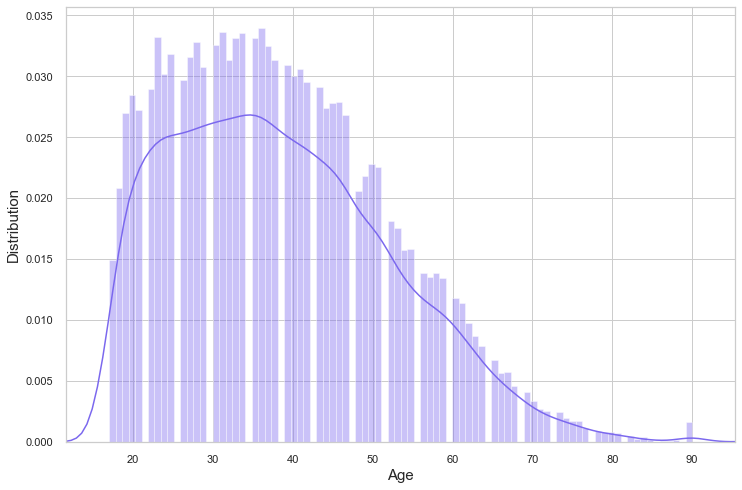

In [40]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15 )

plt.margins(x = 0)

print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

In [41]:
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)

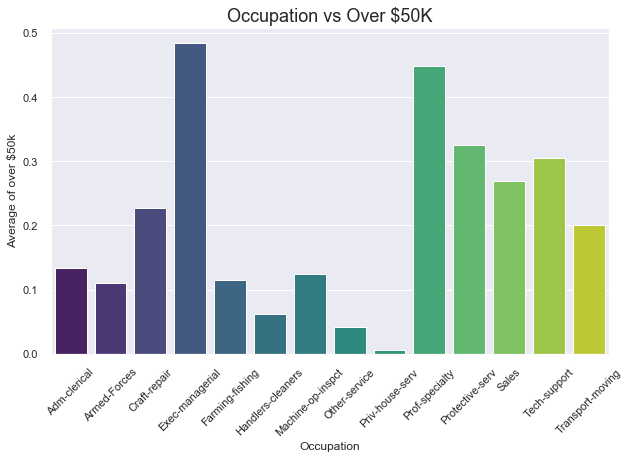

In [45]:
plt.figure(figsize = (10,6))
y = df.groupby(['occupation']).over_50k.mean();
x = y.index
sns.barplot(x,y, palette='viridis')
sns.set(style='darkgrid')
plt.title('Occupation vs Over $50K', fontsize=18);
plt.xlabel('Occupation');
plt.xticks(rotation=45)
plt.ylabel('Average of over $50k');
# plt.suptitle(, fontsize=12);

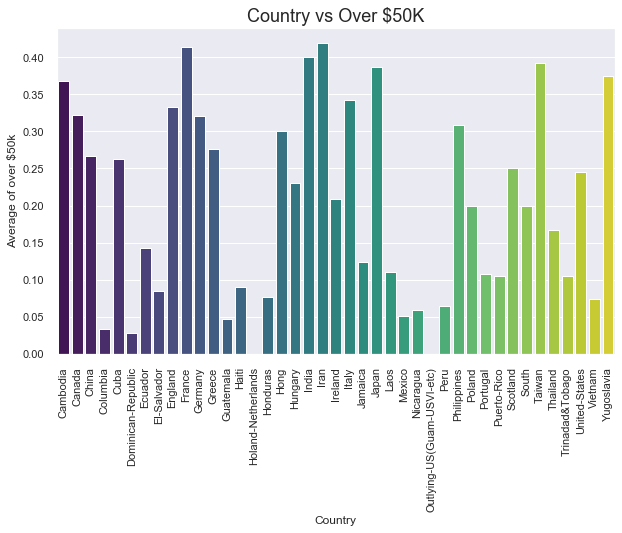

In [47]:
plt.figure(figsize = (10,6))
y = df.groupby(['native_country']).over_50k.mean();
x = y.index
sns.barplot(x,y, palette='viridis')
sns.set(style='darkgrid')
plt.title('Country vs Over $50K', fontsize=18);
plt.xlabel('Country');
plt.xticks(rotation=90)
plt.ylabel('Average of over $50k');
# plt.suptitle(, fontsize=12);

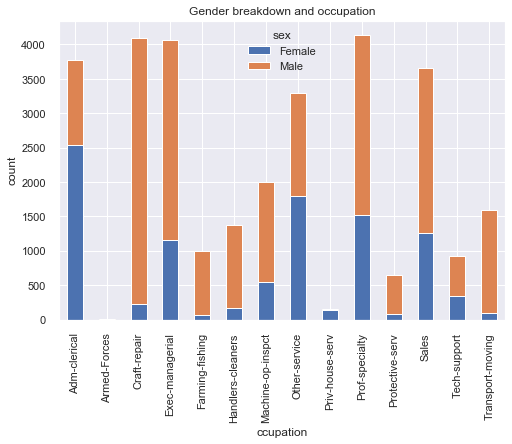

In [49]:
df.groupby(['occupation','sex']).occupation.count().unstack().plot.bar(stacked=True, );
plt.title('Gender breakdown and occupation');
plt.xlabel('occupation');
plt.ylabel('count');

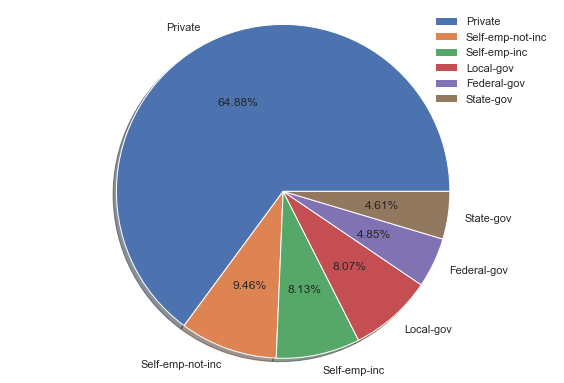

In [51]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
df = df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)
# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()